# Laboratorio 7: Analisis de Redes Sociales

* Jose Jo 14343
* Eric Mendoza 15002
* Marlon Fuentes 15240
---

### Introducción 

En el siguiente reporte se presenta los resultados obtenidos al análisar las opiniones de las personas acerca del tráfico en Guatemala. Para este estudio se útilizo twitter como fuente de obtención de data. 


### 1. Preparación de Entorno

**1.1 Carga de Librerias**

In [0]:
import tweepy as tw
import re
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

**1.2 Conexión de API**

In [0]:
#credenciales de twitter
consumer_key = '7luA64Oj8agDpvB4xwHPhFFP7'
consumer_secret = 'cq4xThEXUYNbFi6s3xcKYuHIdZHGOW0GpA54dlwwwajGq3vl9l'
access_key= '3009764083-P128RjXECZSZGo6i56YD9nR4INiwbSTEzJErHJt'
access_secret = 'F86Wxm9qi3bvBm8UbL9wuzNKmTOsPG4WxbRZ1osFbQEQ6'

#Conexion utilizando tweepy
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tw.API(auth)

### 2. Problema 2: Temblores en Guatemala


**2.1 Obtencion de la data**

In [277]:
#agregar termino de busqueda, eliminar retuits y realizar busqueda en Guatemala


search_terms="#TraficoGT OR #TransitoGT"+" -filter:retweets"




tweets=tw.Cursor(api.search,q=search_terms).items()

traffic_list=[tweet.text for tweet in tweets]
print(len(quake_list))

def sample_printer(text):
  for i in range(0,10):
    print(text[i])
  


781


**2.2 Limpieza de Datos**

- Estandarización del texto 
  - Conversión a minúsculas

In [278]:
#lista original
sample_printer(traffic_list)

Intensas lluvias provocaron esta noche desbordamiento de caudal del río Platanitos, afectó varios sectores de Villa… https://t.co/iLojQ3h7rg
Intensas lluvias provocaron esta noche desbordamiento de caudal del río Platanitos, afectó varios sectores de Villa… https://t.co/5zZ0jYnlx6
Intensas lluvias provocaron esta noche desbordamiento de caudal del río Platanitos, afectó varios sectores de Villa… https://t.co/7dycpwdBuG
Intensas lluvias provocaron esta noche desbordamiento de caudal del río Platanitos, afectó varios sectores de Villa… https://t.co/tmfrhtgYc9
San Miguel Petapa, Guatemala.

Fuerte #LluviaGT afectó colonia Villa Hermosa.

Reportan daños en banquetas, paredes… https://t.co/uDAEUYTYqZ
Mt.6:34: Así que, no os afanéis por el día de mañana, porque cada día traerá su afán Hasta mañana con mas informaci… https://t.co/7881dsLEwS
Y la #LluviaGt sigue en esta noche...
#ClimaGt 
#TraficoGT 
#TransitoGt
Deberían de salir ya para sus trabajos por el #TraficoGT 😬
No importa jurisdicción

In [279]:
#minusculas
traffic_lower=[i.lower() for i in traffic_list]
sample_printer(traffic_lower)

intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… https://t.co/ilojq3h7rg
intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… https://t.co/5zz0jynlx6
intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… https://t.co/7dycpwdbug
intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… https://t.co/tmfrhtgyc9
san miguel petapa, guatemala.

fuerte #lluviagt afectó colonia villa hermosa.

reportan daños en banquetas, paredes… https://t.co/udaeuytyqz
mt.6:34: así que, no os afanéis por el día de mañana, porque cada día traerá su afán hasta mañana con mas informaci… https://t.co/7881dslews
y la #lluviagt sigue en esta noche...
#climagt 
#traficogt 
#transitogt
deberían de salir ya para sus trabajos por el #traficogt 😬
no importa jurisdicción

- Quitar los URL

In [280]:
traffic_url=[re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*','',i) for i in traffic_lower]
sample_printer(traffic_url)

intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… 
intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… 
intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… 
intensas lluvias provocaron esta noche desbordamiento de caudal del río platanitos, afectó varios sectores de villa… 
san miguel petapa, guatemala.

fuerte #lluviagt afectó colonia villa hermosa.

reportan daños en banquetas, paredes… 
mt.6:34: así que, no os afanéis por el día de mañana, porque cada día traerá su afán hasta mañana con mas informaci… 
y la #lluviagt sigue en esta noche...
#climagt 
#traficogt 
#transitogt
deberían de salir ya para sus trabajos por el #traficogt 😬
no importa jurisdicción de quien sea!!! k mal.. al sur aguilar batres puente al cenma , peligroso! n asfalto pelado… 
que paso en campo marte que está parado tot

- Quitar Caracteres especiales y Emojis

In [281]:
traffic_special=[re.sub('[^a-zA-Z0-9 ]+','', i) for i in traffic_url]
sample_printer(traffic_special)

intensas lluvias provocaron esta noche desbordamiento de caudal del ro platanitos afect varios sectores de villa 
intensas lluvias provocaron esta noche desbordamiento de caudal del ro platanitos afect varios sectores de villa 
intensas lluvias provocaron esta noche desbordamiento de caudal del ro platanitos afect varios sectores de villa 
intensas lluvias provocaron esta noche desbordamiento de caudal del ro platanitos afect varios sectores de villa 
san miguel petapa guatemalafuerte lluviagt afect colonia villa hermosareportan daos en banquetas paredes 
mt634 as que no os afanis por el da de maana porque cada da traer su afn hasta maana con mas informaci 
y la lluviagt sigue en esta nocheclimagt traficogt transitogt
deberan de salir ya para sus trabajos por el traficogt 
no importa jurisdiccin de quien sea k mal al sur aguilar batres puente al cenma  peligroso n asfalto pelado 
que paso en campo marte que est parado totalmente amilcarmontejo traficogt traficogt


- Eliminación de Stopwords y abreviaturas comúnes

In [0]:
stopwords=set(stopwords.words('spanish'))
special_words=['traficogt','transitogt','trficogt','trnsitogt','da','rbol']
for i in special_words:
    stopwords.add(i)


In [283]:
traffic_clean=[]

# Revisar las palabras en cada oracion

for tweet in traffic_special:
    word_list=[]
    for word in tweet.split():
        if word not in stopwords:
            word_list.append(word)
    traffic_clean.append(' '.join(word_list))

sample_printer(traffic_clean)

intensas lluvias provocaron noche desbordamiento caudal ro platanitos afect varios sectores villa
intensas lluvias provocaron noche desbordamiento caudal ro platanitos afect varios sectores villa
intensas lluvias provocaron noche desbordamiento caudal ro platanitos afect varios sectores villa
intensas lluvias provocaron noche desbordamiento caudal ro platanitos afect varios sectores villa
san miguel petapa guatemalafuerte lluviagt afect colonia villa hermosareportan daos banquetas paredes
mt634 as afanis maana cada traer afn maana mas informaci
lluviagt sigue nocheclimagt
deberan salir trabajos
importa jurisdiccin k mal sur aguilar batres puente cenma peligroso n asfalto pelado
paso campo marte est parado totalmente amilcarmontejo


### Analisis Exploratorio

**3. Frecuencia de palabras**

In [284]:
tweet_frequency=Counter()

for tweet in traffic_clean:
  tweet_frequency.update(palabra.strip('.,?!"\'').lower() for palabra in tweet.split())

frequency_frame= pd.DataFrame.from_dict(tweet_frequency, orient='index').reset_index()
frequency_frame=frequency_frame.rename(columns={"index":"palabra",0:"frecuencia"})

frequency_frame.head()

,palabra,frecuencia
0,intensas,8
1,lluvias,13
2,provocaron,4
3,noche,11
4,desbordamiento,5


**4. Palabras más Repetidas**

In [285]:
frequency_frame.sort_values(by=['frecuencia'],ascending=False).head()

,palabra,frecuencia
162,zona,144
190,ruta,116
188,km,103
183,calle,89
150,avenida,81


**5. Word Cloud**

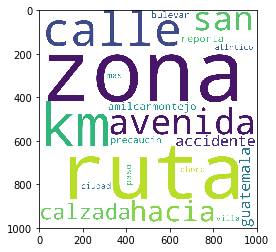

In [286]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(tweet_frequency)
plt.imshow(wc)

En base al word cloud se puede notar que los tuits tienen mucha informacion acerca del trafico, y no tanto opinion del mismo. Existe muchos termines como "zona","km","ruta" que son terminos que no reflejan opinion al resepecto. Al igual que muchas personas usan el nombre amilcarmontejo, para reportar de zonas de trafico en el area de las mismas.

[Text(0, 0, 'zona'),
 Text(0, 0, 'ruta'),
 Text(0, 0, 'km'),
 Text(0, 0, 'calle'),
 Text(0, 0, 'avenida'),
 Text(0, 0, 'san'),
 Text(0, 0, 'hacia'),
 Text(0, 0, 'calzada'),
 Text(0, 0, 'accidente'),
 Text(0, 0, 'guatemala'),
 Text(0, 0, 'amilcarmontejo'),
 Text(0, 0, 'reporta'),
 Text(0, 0, 'precaucin'),
 Text(0, 0, 'bulevar'),
 Text(0, 0, 'paso')]

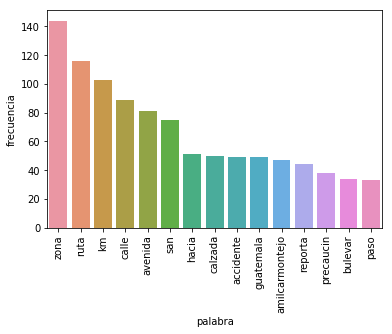

In [287]:
ordered_frame=frequency_frame.sort_values(by=['frecuencia'],ascending=False)

sliced_frame=ordered_frame[:15]

top_fifteen=sns.barplot(data=sliced_frame,x='palabra',y='frecuencia')

top_fifteen.set_xticklabels(top_fifteen.get_xticklabels(), rotation=90)


[Text(0, 0, 'san'),
 Text(0, 0, 'hacia'),
 Text(0, 0, 'guatemala'),
 Text(0, 0, 'accidente'),
 Text(0, 0, 'reporta'),
 Text(0, 0, 'precaucin'),
 Text(0, 0, 'paso'),
 Text(0, 0, 'ciudad'),
 Text(0, 0, 'ahora'),
 Text(0, 0, 'mas'),
 Text(0, 0, 'lento'),
 Text(0, 0, 'pacfico'),
 Text(0, 0, 'villa'),
 Text(0, 0, 'atlntico'),
 Text(0, 0, '12')]

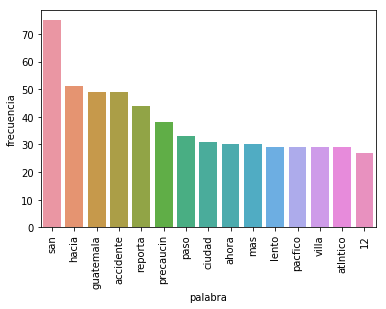

In [288]:
information_word=['zona','km','calle','calzada','bulevar','ruta','avenida','amilcarmontejo']
without_information=frequency_frame[~frequency_frame.palabra.isin(information_word)]


order_without=without_information.sort_values(by=['frecuencia'],ascending=False)

new_sliced=order_without[:15]

top_without=sns.barplot(data=new_sliced,x='palabra',y='frecuencia')

top_without.set_xticklabels(top_without.get_xticklabels(), rotation=90)

A continuacion se realiza un analisis por grupos de palabras relacionadas con rutas, de manera que se pueda tener visibilidad en cuales rutas son las mas reportadas con trafico.
Primero se obtendra las oraciones que tengan las palabras constantes que se desea indagar un poco mas. Segun los resultados previos son: "san","bulevar","zona" y "km"

In [0]:
san_list=[]
bulevar=[]
zona=[]
km=[]

for i in traffic_clean:
  for j in i.split():
    count=0
    count=+1
    if(j=='san'):
      san_list.append(i)
    if(j=='bulevar'):
      bulevar.append(i)
    if(j=='zona'):
      zona.append(i)
    if(j=='km'):
      km.append(i)


In [290]:
sample_printer(san_list)

san miguel petapa guatemalafuerte lluviagt afect colonia villa hermosareportan daos banquetas paredes
buenas noches pedimos patrulla urgente vale zempoala 36 casi esquina san borja col independencia
nomsviolencia mpguatemala trabaja escena ataque armado 7 avenida calzada san jua
bachejueputa guatemala noprospera acaba hacer shot carro bueno llanta 9calle 5ta av san
choque heridos anillo periferico san juan amilcarmontejo ciudadpmt
altura peri roosevelt lado calzada san juan personas tirando grasa holln l
camin volteo averiadoruta pacfico amatitlnkm 255 prximo ingreso san jorgeobstaculiza medio
est dificil pasar san lucas cola est mirador
trnsito comprado examen licencia sepan manejar semana san
inicia llegar mirador san lucassaleantiguazo


In [291]:
sample_printer(bulevar)

lluviagtafecta reas zona 1 2 5 6 7 10 15 16 17 18precaucin calzada paz bulevar
transitogtvehculo neumtico pinchado bulevar asuncin zona 5
puente asuncincarro neumtico pinchado bulevar asuncin zona 5 7 calle final
transitogtcamioneta agrcola averiada bulevar vista hermosa
pasajero microbs fallece tras ataque armado bulevar liberacin 13 calle zona 9via
pasajero microbs fallece tras ataque armado bulevar liberacin 13 calle zona 9otro pasajero
ultimominutogtpasajero microbs fallece tras ataque armado bulevar liberacin 13 calle zona
sucesos fallecido dentro microbs deja ataque armado bulevar liberacin 13 calle zo
nomsviolencia persona muere resulta herida luego ataque armado bulevar liberacin zo
precaucin paso desnivel pap francisco bulevar prceres 27 avenida zona10 cerrado momentne


In [292]:
sample_printer(zona)

traficogtun fuerte accidente trnsito dej dos personas fallecidas zona 12 capital
taxi colisiona pared negocio ubicado 2 avenida 9 calle zona 1 deja
pared2 avenida 9 calle zona 1 taxi choca negocio herido auxiliado lugarprecauci
queda habilitada calzada atanasio tzul 31 calle zona 12durante madrugada vehculo impact cont
queda habilitada calzada atanasio tzul 31 calle zona 12durante madrugada vehculo impact contr
queda habilitada nuevamente calzada atanasio tzul 31 calle zona 12 tras aparatoso accid
queda habilitada calzada atanasio tzul 31 calle zona 12durante madrugada vehculo impact cont
madrugada ocurri aparatoso accidente calzada atanasio tzul 31 calle zona 12 ca
carro incendi calzada aguilar batres 32 calle zona 11no heridos segn bomberos ini
lluviagtafecta reas zona 1 2 5 6 7 10 15 16 17 18precaucin calzada paz bulevar


In [293]:
sample_printer(km)

precaucin personas dirigen sur norte reportan km 32 ruta pacfic
precaucinen ruta atlntico km 6 km 75 zona 17 avanza desfile escolar carril derec
precaucinen ruta atlntico km 6 km 75 zona 17 avanza desfile escolar carril derec
vehculo diriga sur derrib poste alumbrado pblico cay km 14 pacfico hac
reporta accidente km 14 ruta pacfico precaucin lugar
frenemoslosaccidentes precaucin km 14 ruta pacfico accidente res
precaucin accidente km 14 5 ruta pacficovehculo derriba poste energa elctrica
trailer colisiona separadores viales km 125 ruta salvador afectando ambas vasusuario
trailer colisiona separadores viales km 125 ruta salvador afectando ambas vasusuario
fuerte accidente km 39 carretera interamericana carril hacia ciudad guatemala


A continuacion creamos tablas de frecuencias para cada uno de las nuevas funtes de datos ya que queremos saber que palabras son las mas repetidas en estos casos. Se quito las palabras clavles mencionadas previamente ya que no queriamos que afectaran la frecuencia de las otras

In [294]:
def cleaner(word,list_sentences):
  no_word=['san']
  no_word.append(word)
  new_list=[]
  for tweet in list_sentences:
      word_list=[]
      for word in tweet.split():
          if word not in no_word:
              word_list.append(word)
      new_list.append(' '.join(word_list))
  print(new_list)
  return new_list
san_removes=cleaner('san',san_list)
bulevar_removes=cleaner("bulevar",bulevar)
zona_removes=cleaner("zona",zona)
km_removes=cleaner("km",km)

print(san_removes)

san_frequency=Counter()

for tweet in san_removes:
  san_frequency.update(palabra.strip('.,?!"\'').lower() for palabra in tweet.split())

bulevar_frequency=Counter()

for tweet in bulevar_removes:
  bulevar_frequency.update(palabra.strip('.,?!"\'').lower() for palabra in tweet.split())

zona_frequency=Counter()

for tweet in zona_removes:
  zona_frequency.update(palabra.strip('.,?!"\'').lower() for palabra in tweet.split())

km_frequency=Counter()

for tweet in km_removes:
  km_frequency.update(palabra.strip('.,?!"\'').lower() for palabra in tweet.split())



['miguel petapa guatemalafuerte lluviagt afect colonia villa hermosareportan daos banquetas paredes', 'buenas noches pedimos patrulla urgente vale zempoala 36 casi esquina borja col independencia', 'nomsviolencia mpguatemala trabaja escena ataque armado 7 avenida calzada jua', 'bachejueputa guatemala noprospera acaba hacer shot carro bueno llanta 9calle 5ta av', 'choque heridos anillo periferico juan amilcarmontejo ciudadpmt', 'altura peri roosevelt lado calzada juan personas tirando grasa holln l', 'camin volteo averiadoruta pacfico amatitlnkm 255 prximo ingreso jorgeobstaculiza medio', 'est dificil pasar lucas cola est mirador', 'trnsito comprado examen licencia sepan manejar semana', 'inicia llegar mirador lucassaleantiguazo', 'trnsitogtamilcar montejo reporta ataque armado motorista calzada juan', 'disparan motorista calzada juan km 145 mixcoen intento evitar ser baleado intent llegar', 'disparan motorista calzada juan km 145 mixcoen intento evitar ser baleado intent llegar', 'disp

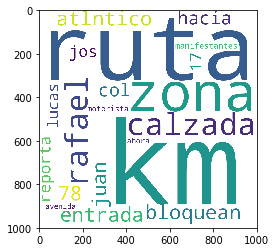

In [295]:
ws = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(san_frequency)
plt.imshow(ws)


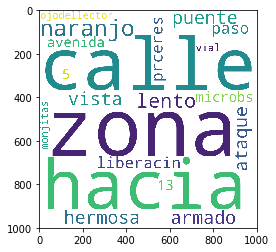

In [296]:
wb = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(bulevar_frequency)
plt.imshow(wb)


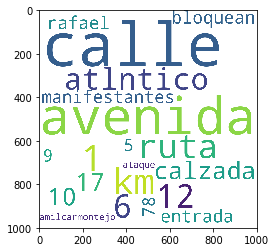

In [297]:
wz = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(zona_frequency)
plt.imshow(wz)


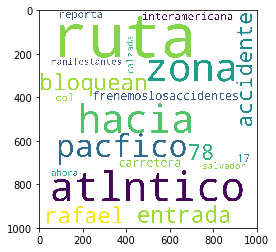

In [298]:
wk = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(km_frequency)
plt.imshow(wk)

#### Descubrimientos encontrados

En base a los resultados obtenidos podemos encontrar cosas interesantes acerca del trafico en Guatemala. En primer lugar, y bastante evidente, es que la mayoria de los tuits realizados son mas para informar que para quejarse del mismo, esto se puede notar en las frecuencias de las palabras ya que la mayoria son palabras que describen una ubicacion o hablan de lo sucedido. Por otro lado, los accidentes son la causa mayoritaria por la cual se produce el trafico. Esto se puede notar a que se mantuvo constante en la mayoria de los analisis. Otras razones de trafico: bloqueos, manifestaciones y ataques armados, segun los resultados que obtuvimos. Por otro lado, las areas principales afectadas resultan siendo: vista hermosa, ruta hacia el atlantico, zona 1 y zona 10. Esto es notorio en los wordclouds realizados.

### Conclusiones



*   Gran parte de los tuits sobre el trafico en guatemala son informativos y no de opinion
*   La cuenta de tuiter "amilcarmontejo" es un claro constante y es notorio que mucha gente le envia informacion a el acerca del transito.
*   Las razones de transito mas comun son los accidentes
*   Vista hermosa y ruta del atlantico son las areas mas mencionadas con transito 

